# Creating flag: frequent buyer

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import os

## Creating path for folder

In [6]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [9]:
# Importing subset with only high activity customers

In [11]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [129]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag', 'mean_order_cost_per_user', 'spending_flag',
       'income_group', 'median_days_since_prior_order_per_user', 'freq_buyer'],
      dtype='object')

In [13]:
instacart.shape

(30963518, 30)

In [75]:
freq_buyer_set = instacart[['user_id', 'order_id', 'days_since_prior_order', 'median_days_since_prior_order_per_user' ]]

In [77]:
freq_buyer_set.shape

(30963518, 4)

## 1. Subsetting

In [80]:
# Creating a subset withou duplicates

freq_buyer_set_nodups = freq_buyer_set.drop_duplicates()

In [82]:
freq_buyer_set_nodups.shape

(3064375, 4)

## 2. Definition of freq_buyer

In [31]:
freq_buyer_set_nodups['days_since_prior_order'].describe()

count    3.064375e+06
mean     9.834551e+00
std      8.809020e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [33]:
freq_buyer_set_nodups['days_since_prior_order'].median()

7.0

In [37]:
# mean > median, data is rught skewed. Will use median for definition

## 3. Creating new column: median_days_since_prior_order_per_user

In [71]:
#new column 

instacart['median_days_since_prior_order_per_user'] = instacart.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_12591/2974157429.py:3: FutureWarning: The provided callable <function median at 0x104aa0860> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  instacart['median_days_since_prior_order_per_user'] = instacart.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


In [61]:
instacart.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,max_order_per_user,products_per_order,order_cost,Region,age_group,loyalty_flag,mean_order_cost_per_user,spending_flag,income_group,median_days_since_prior_order_per_user
0,2,33120,1,1,202279,3,5,9,8,Organic Egg Whites,...,8,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0
1,2,28985,2,1,202279,3,5,9,8,Michigan Organic Kale,...,8,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0
2,2,9327,3,0,202279,3,5,9,8,Garlic Powder,...,8,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0
3,2,45918,4,1,202279,3,5,9,8,Coconut Butter,...,8,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0
4,2,30035,5,0,202279,3,5,9,8,Natural Sweetener,...,8,9,91.6,West,mature,New customer,100.342222,regular spender,High,24.0


## 4. Creating new column: freq_buyer

In [86]:
# freq_buyer

# If median of 'days_since_prior_order' <= 7 = 'frequent-customer'
# If median of 'days_since_prior_order' > 7 = 'non-frequent-customer'


In [90]:
freq_buyer = [
    'frequent-buyer' if value <= 7 else
    'non-frequent-buyer'
    for value in instacart['median_days_since_prior_order_per_user']
]

In [92]:
# Creating new column with the result

instacart['freq_buyer'] = freq_buyer

In [94]:
#checking procedure

instacart['freq_buyer'].value_counts()

freq_buyer
frequent-buyer        16537776
non-frequent-buyer    14425742
Name: count, dtype: int64

## 5. Creating a distribution chart of distribution frequent-buyers

In [131]:
IC_freq = instacart[['freq_buyer', 'user_id', 'Region', 'spending_flag', 'income_group', 'age_group']]

In [132]:
IC_freq.shape

(30963518, 6)

In [135]:
# Creating a subset withou duplicates

IC_freq_nodups = IC_freq.drop_duplicates()

In [137]:
IC_freq_nodups.shape

(162631, 6)

In [115]:
IC_freq['freq_buyer'].value_counts(dropna = False)

freq_buyer
frequent-buyer        16537776
non-frequent-buyer    14425742
Name: count, dtype: int64

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

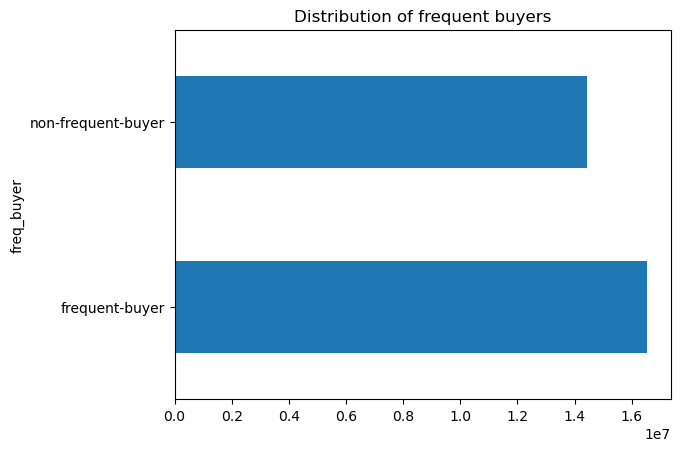

In [121]:
# Creating a bar chart with freq-buyers distribution

bar = IC_freq['freq_buyer'].value_counts().plot.barh(title="Distribution of frequent buyers")

<Axes: xlabel='Region', ylabel='count'>

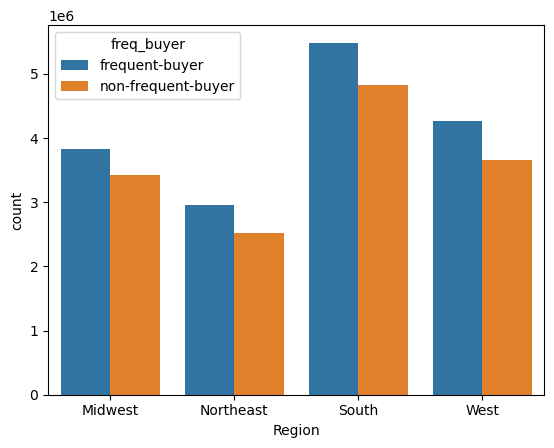

In [123]:
# Stacked bar chart

sns.barplot(x='Region', y='count', hue='freq_buyer', data=IC_freq.groupby(['Region', 'freq_buyer']).size().reset_index(name='count'))

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_12591/68161425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='income_group', y='count', hue='freq_buyer', data=IC_freq.groupby(['income_group', 'freq_buyer']).size().reset_index(name='count'))


<Axes: xlabel='income_group', ylabel='count'>

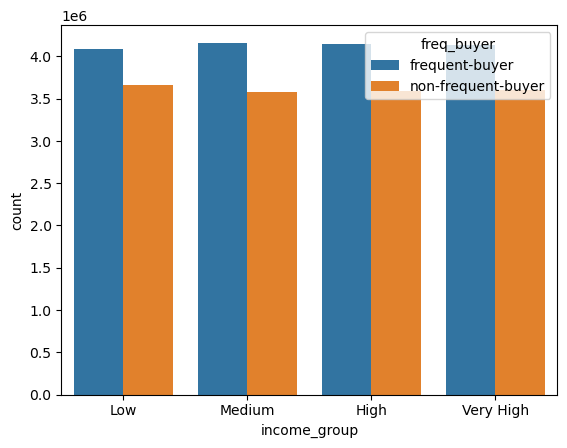

In [127]:
# Stacked bar chart

sns.barplot(x='income_group', y='count', hue='freq_buyer', data=IC_freq.groupby(['income_group', 'freq_buyer']).size().reset_index(name='count'))

<Axes: xlabel='age_group', ylabel='count'>

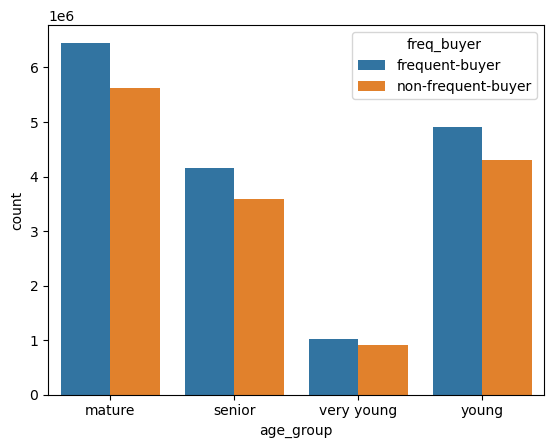

In [139]:
# Stacked bar chart

sns.barplot(x='age_group', y='count', hue='freq_buyer', data=IC_freq.groupby(['age_group', 'freq_buyer']).size().reset_index(name='count'))

<Axes: xlabel='freq_buyer', ylabel='count'>

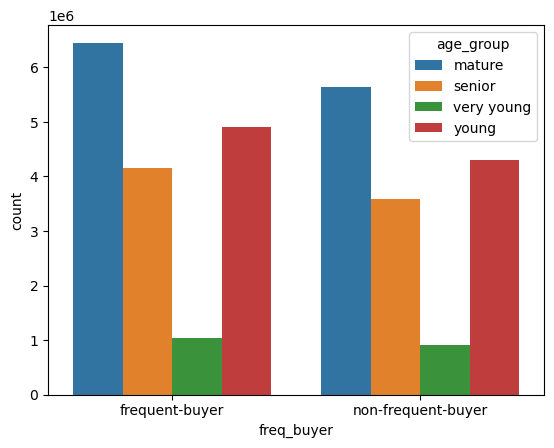

In [141]:
# Stacked bar chart

sns.barplot(x='freq_buyer', y='count', hue='age_group', data=IC_freq.groupby(['age_group', 'freq_buyer']).size().reset_index(name='count'))

In [71]:
# exporting plot

plt.savefig(os.path.join(path, 'Analysis', 'Final Visualization', 'age_groups_counts.png'))

<Figure size 640x480 with 0 Axes>

In [125]:
# exporting plot

bar.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'freq_buyer_bar.jpeg'))

## 3. Exporting 

In [99]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [101]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'backup', 'IC_high_activity_2.pkl'))